# Ejercicio 4 - Estadística descriptiva
Erik Yuste

In [1]:
import pandas as pd

In [2]:
game = pd.read_csv('games.csv')
rounds = pd.read_csv('round_in_games.csv')
words = pd.read_csv('words.csv')

## Words

### Distribución de preguntas por número de letras

Frecuencia absoluta contando exclusivamente las palabras del fichero de words.csv (sin repetición):

word
7     12
6      5
5      4
8      3
10     2
9      2
13     1
12     1
Name: count, dtype: int64

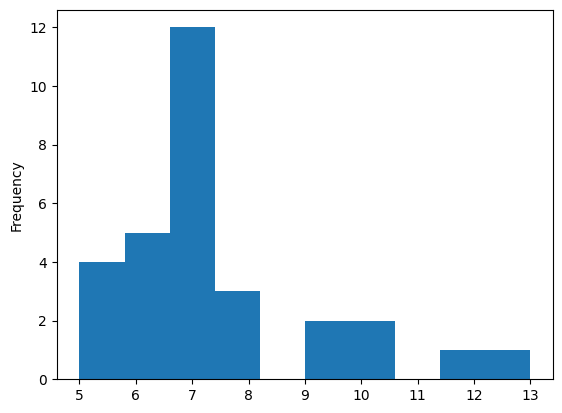

In [3]:
wordlen = words['word'].apply(len)

wordlen.plot.hist()
wordlen.value_counts()

Usando las palabras preguntadas en rondas jugadas (con repetición):

word
7     40
6     20
5     11
8      8
9      6
13     5
10     5
12     1
Name: count, dtype: int64

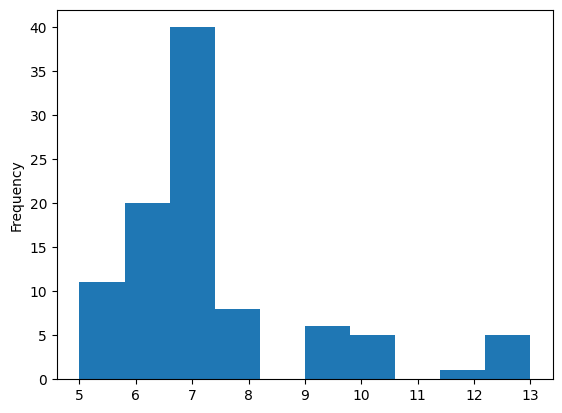

In [4]:
# Obtenemos las palabras preguntadas en cada ronda
wordlen = rounds['word']

# Obtenemos las longitudes
wordlen = wordlen.apply(len)

# Visualización de la frecuencia con histograma
wordlen.plot.hist()

# Contamos la frecuencia de los valores
wordlen.value_counts()

## Rounds

### Número de usuarios diferentes que han participado en alguna partida

In [16]:
usuarios = list(rounds['username'].unique())
print(usuarios)
nusuarios = len(usuarios)
print('Número de usuarios diferentes:', nusuarios)

['erik', 'usuario', 'nuevo', 'otro', 'nombre', 'prueba', 'novato']
Número de usuarios diferentes: 7


### Top 5 de usuarios que más rondas han ganado por partida

In [6]:
# Solo las columnas que vayamos a usar (username, game_id, victory)
top5 = rounds[['username', 'game_id', 'victory']]

# Agrupamos y sumamos las victorias de cada partida (reset_index es para evitar Multiindex)
top5 = top5.groupby(['username', 'game_id']).sum('victory').reset_index()

# Ordenamos por numero de victorias
top5 = top5.sort_values('victory', ascending=False)

# Obtenemos el top de partidas con sus usuarios
top5 = top5[:5]

top5

,username,game_id,victory
31,usuario,bbfc7836-c7b1-4b71-83b9-d2a29d0b24c0,3
1,erik,25bbd546-d7c7-4b52-9a7f-3a215e1aff9e,3
2,erik,633b99b5-f279-4cb7-9fe1-a1746a7b0d7c,3
3,erik,b79c8710-7bb6-4216-96e1-31e435b24b84,3
30,usuario,ba46efce-0f74-4f2e-9aa1-d4e7542956d7,3


## Game

### Top 5 de usuarios con más puntuación final

Top 5 con repetición:

In [7]:
# Ordenamos de mayor a menor
top5 = game.sort_values(['final_score'], ascending=False)

# Nos quedamos con los 5 mejores
top5 = top5[:5]

# Nos quedamos solo con los nombres y su puntuacion
top5 = top5[['username', 'final_score']]

top5

,username,final_score
0,erik,3
1,erik,3
2,usuario,3
3,usuario,3
27,erik,3


Top 5 sin repetición:

In [8]:
# Solo usamos username y final_score
top5 = game[['username', 'final_score']]

# Obtenemos la máxima final_score de cada usuario (reset_index es para evitar Multiindex)
top5 = top5.groupby(['username']).max().reset_index()

# Obtenermos el top
top5 = top5.sort_values(['final_score'], ascending=False)

# Nos quedamos con los 5 mejores
top5 = top5[:5]

top5

,username,final_score
0,erik,3
6,usuario,3
1,nombre,2
3,nuevo,2
4,otro,2


### Top 5 de usuarios con más puntuación media
Media de la puntuación de sus partidas -> para esto debéis jugar varias partidas con un mismo nombre de usuario.

In [9]:
# Solo usamos username y final_score
top5 = game[['username', 'final_score']]

# Obtenemos la media de final_score de cada usuario
top5 = top5.groupby(['username']).mean()

# Obtenemos el top
top5 = top5.sort_values(['final_score'], ascending=False)

# Nos quedamos con los 5 mejores
top5 = top5[:5]

top5

,final_score
username,
erik,2.666667
usuario,2.428571
otro,1.750000
nombre,1.666667
prueba,1.250000


### Distribución de las puntuaciones de las partidas
Histograma

final_score
2    12
3     8
1     8
0     4
Name: count, dtype: int64

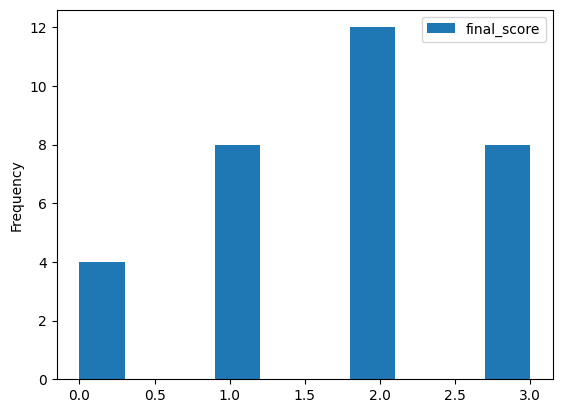

In [10]:
game.plot.hist()
game['final_score'].value_counts()